## Analysis of Bigrams

1. Take any corpus(article) of your choice and analyze all the bigrams present based on ConditionalFrequencyDist and compute the co-occurence matrix.
2. Visualize the co-occurence matrix.

In [14]:
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [22]:
text = "I love iphone . I am so in love with iphone . iphone is great . samsung is great . I really really love iphone cases. samsung can never beat iphone . samsung is better than apple"
token=nltk.word_tokenize(text)
bigrams=ngrams(token,2)


In [23]:
sjf = nltk.ConditionalFreqDist(bigrams)
sjf = pd.DataFrame(sjf).fillna(0)

## Bigram heat map plot ##

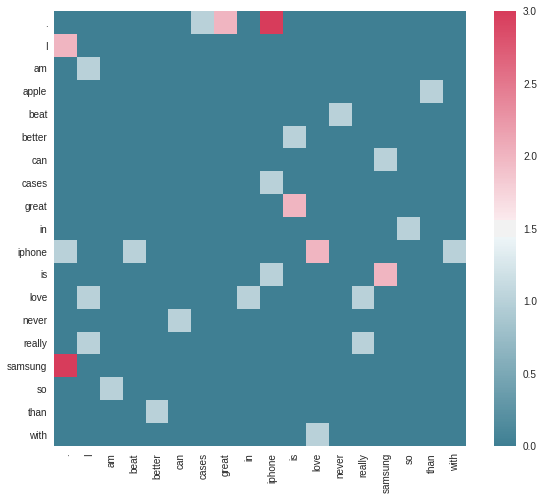

In [17]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sjf, mask = np.zeros_like(sjf, dtype = np.bool),
            cmap = sns.diverging_palette(220, 5, as_cmap = True),
            square = True, ax = ax)
plt.show()

In [18]:
from itertools import tee, islice
from collections import Counter
def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
        else:
            break

p=Counter(ngrams(token, 2))
p

Counter({('.', 'I'): 2,
         ('.', 'iphone'): 1,
         ('.', 'samsung'): 3,
         ('I', 'am'): 1,
         ('I', 'love'): 1,
         ('I', 'really'): 1,
         ('am', 'so'): 1,
         ('beat', 'iphone'): 1,
         ('better', 'than'): 1,
         ('can', 'never'): 1,
         ('cases', '.'): 1,
         ('great', '.'): 2,
         ('in', 'love'): 1,
         ('iphone', '.'): 3,
         ('iphone', 'cases'): 1,
         ('iphone', 'is'): 1,
         ('is', 'better'): 1,
         ('is', 'great'): 2,
         ('love', 'iphone'): 2,
         ('love', 'with'): 1,
         ('never', 'beat'): 1,
         ('really', 'love'): 1,
         ('really', 'really'): 1,
         ('samsung', 'can'): 1,
         ('samsung', 'is'): 2,
         ('so', 'in'): 1,
         ('than', 'apple'): 1,
         ('with', 'iphone'): 1})

In [26]:
x = p.keys()
y = p.values()

a1 = []
a2 = []
x = list(x)
for i in range(0,(len(x))):
    a1.append(x[i][0])
    a2.append(x[i][1])

word1 = list(a1)

word12= list(a2)
df = pd.DataFrame({'Word1':list(a1), 'Word2':list(a2), 'Value':list(y)})
df = df.pivot(index='Word1', columns='Word2', values='Value').fillna(0)
df

ValueError: Index contains duplicate entries, cannot reshape

In [24]:
from itertools import tee, islice
from collections import Counter
def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
            
        else:
            break

p=Counter(ngrams(token, 3))


In [25]:
x = p.keys()
y = p.values()

a1 = []
a2 = []
a3=[]
x = list(x)
for i in range(0,(len(x))):
    a1.append(x[i][0])
    a2.append(x[i][1])
    a3.append(x[i][2])
df = pd.DataFrame({'word1': list(a1),'word2': list(a2),'word3' : list(a3),'b':list(y)})
df.head()

,b,word1,word2,word3
0,1,great,.,samsung
1,1,iphone,cases,.
2,1,samsung,is,great
3,1,so,in,love
4,1,.,samsung,can
